In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')
import os
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import os
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
glass = pd.read_csv('glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
glass.shape

(214, 10)

In [4]:
glass.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [5]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [9]:
plt.rcParams['figure.figsize']=(6,3)
plt.rcParams['figure.dpi']=(200)

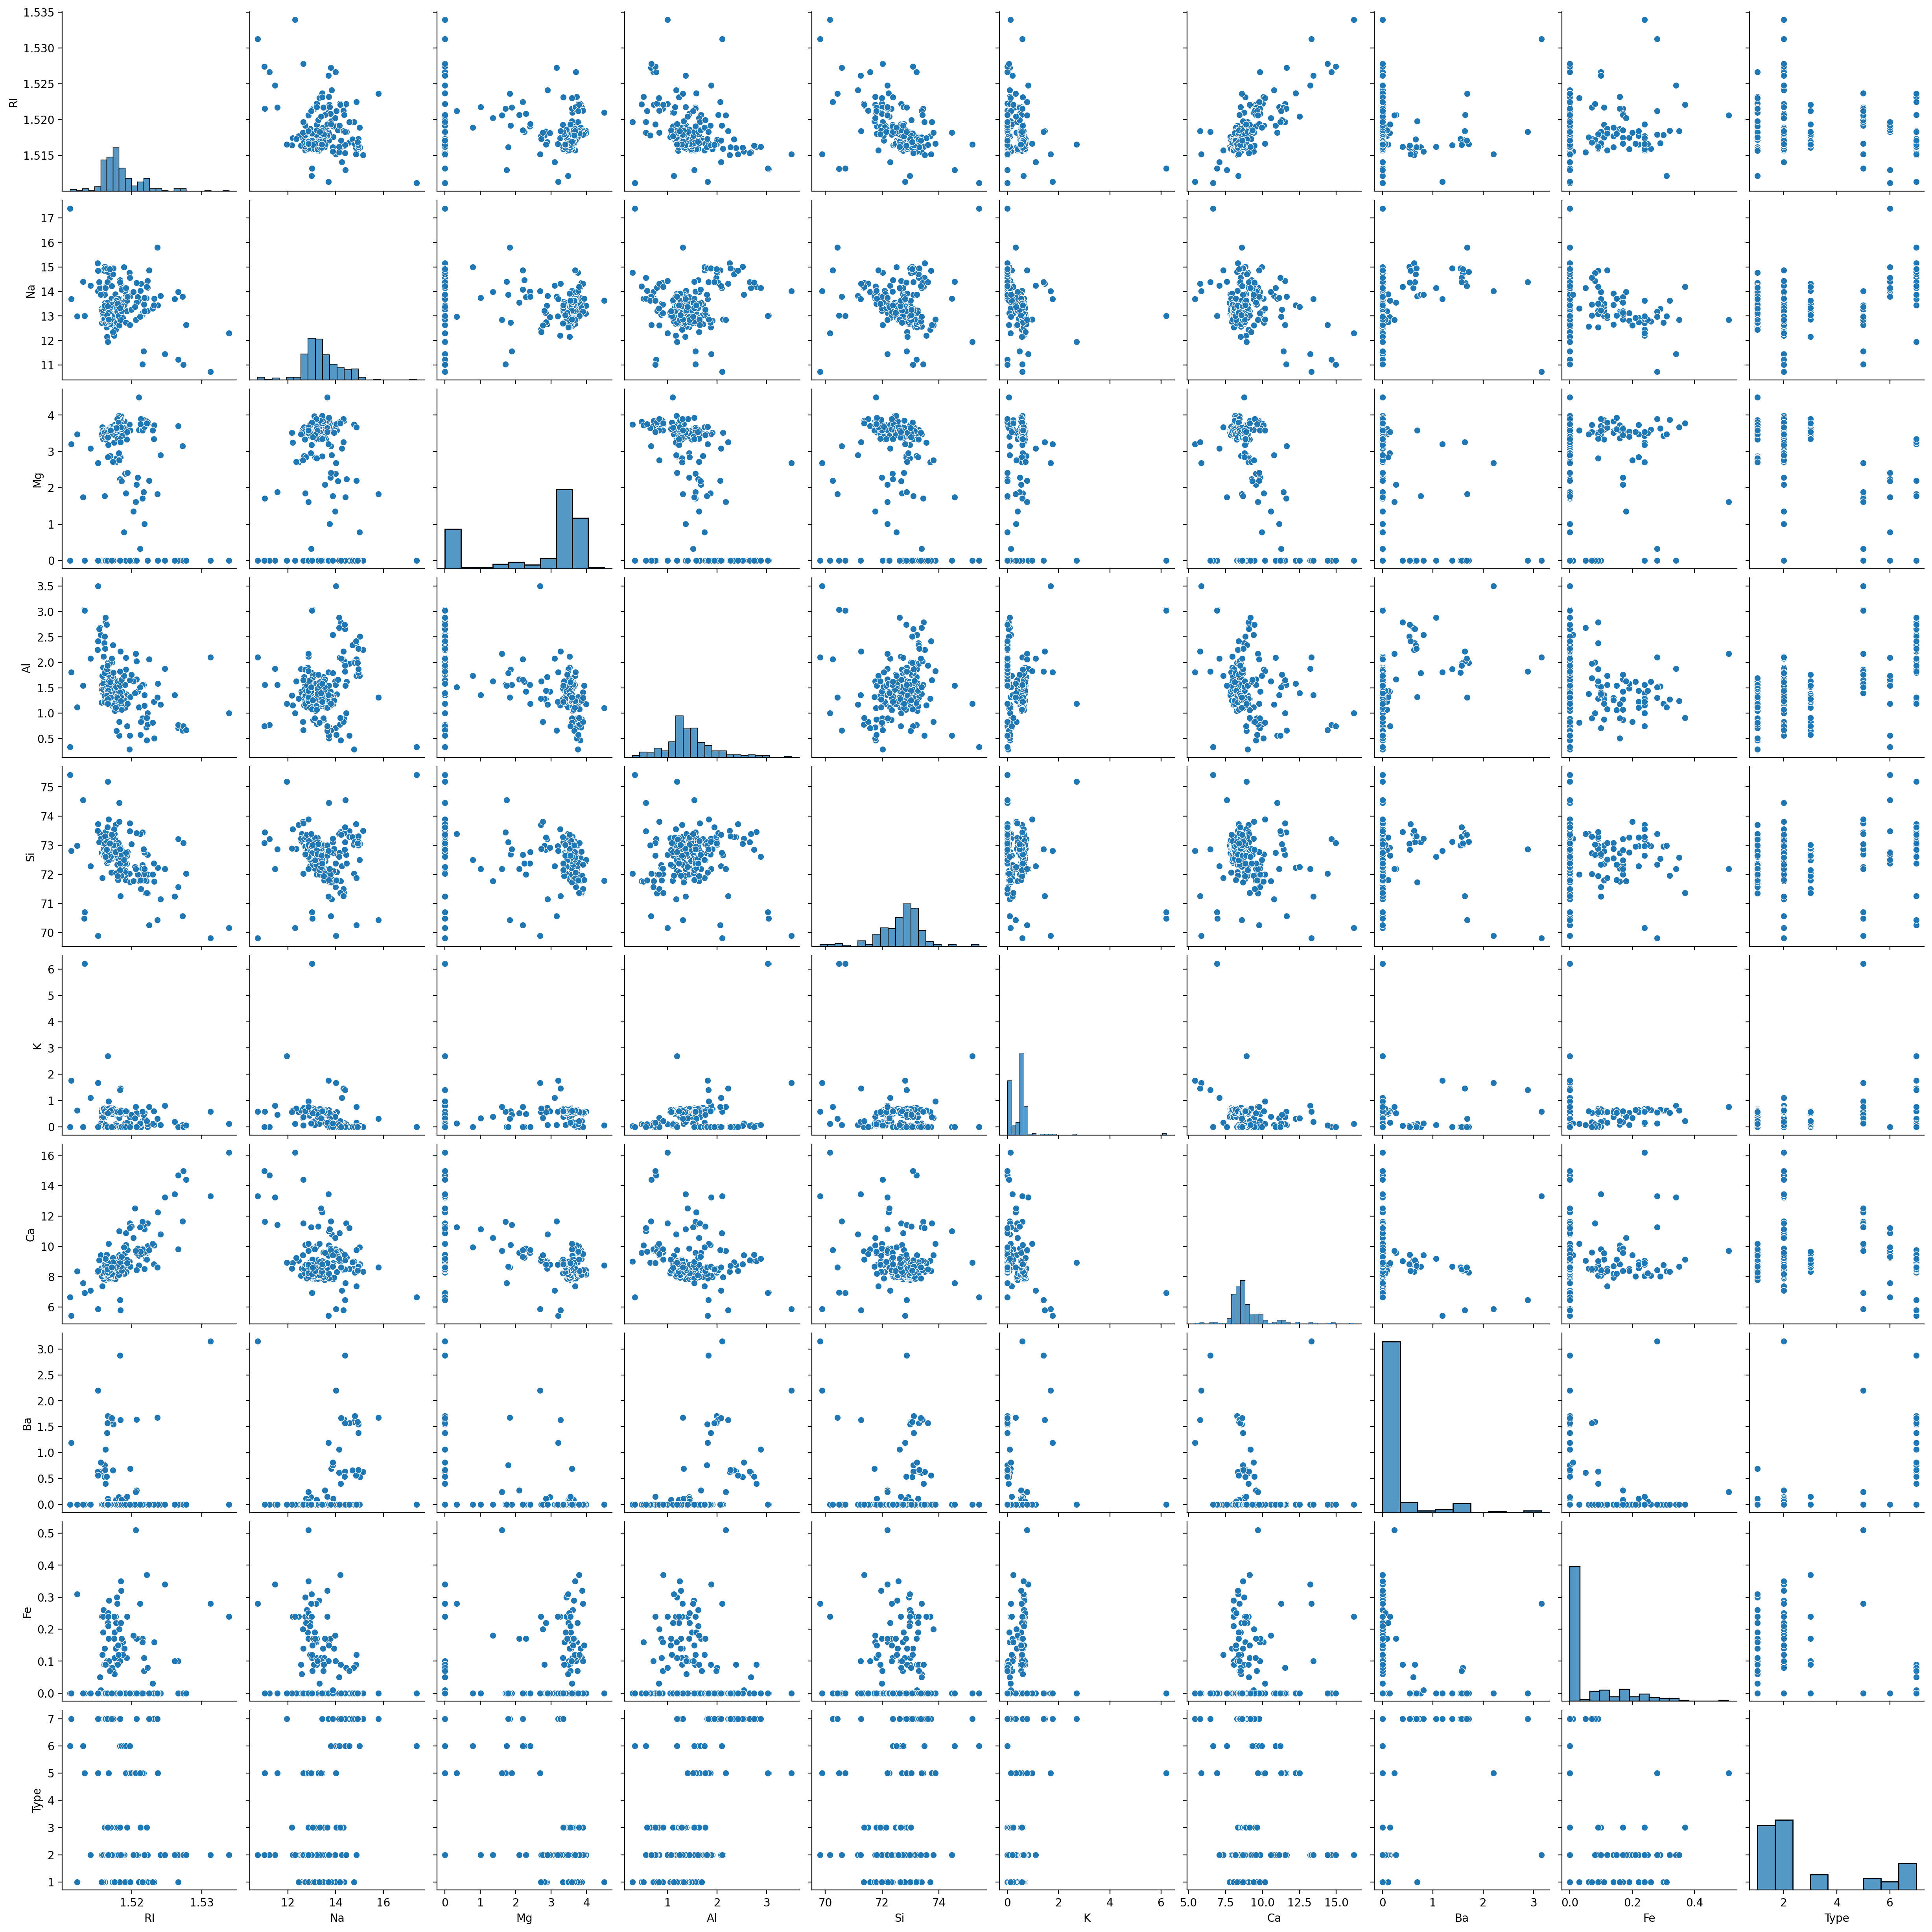

In [10]:
sns.pairplot(glass)

In [11]:
X = np.array(glass.iloc[:,3:5])
Y = np.array(glass['Type'])
print("Shape of X:"+str(X.shape))
print("Shape of Y:"+str(Y.shape))

Shape of X:(214, 2)
Shape of Y:(214,)


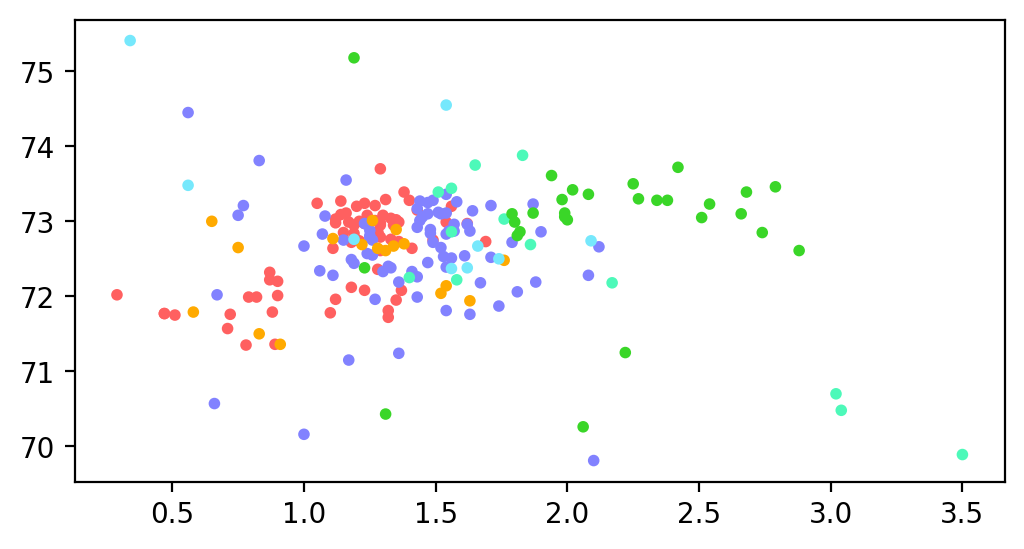

In [12]:
cm_dark = ListedColormap(['#ff6060', '#8282ff', '#ffaa00', '#fff244', '#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf','#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])
# Create color maps
plt.scatter(X[:,0],X[:,1],c=Y,cmap=cm_dark,s=10,label=Y)

<AxesSubplot:xlabel='Na', ylabel='RI'>

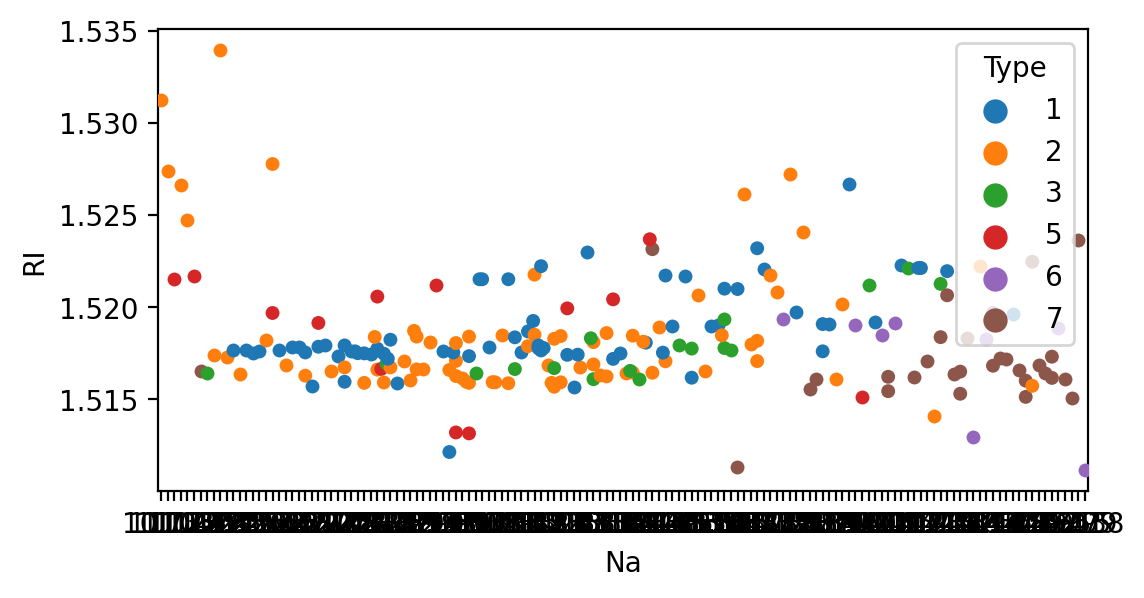

In [13]:
sns.swarmplot(x='Na',y='RI',data=glass,hue='Type')

# Train Test Splitting

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [15]:
print('Shape of X_Train:'+str(X_train.shape))
print('Shape of Y_Train:'+str(Y_train.shape))
print('Shape of X_Test:'+str(X_test.shape))
print('Shape of Y_Test:'+str(Y_test.shape))

Shape of X_Train:(160, 2)
Shape of Y_Train:(160,)
Shape of X_Test:(54, 2)
Shape of Y_Test:(54,)


In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
pred = knn.predict(X_train)
pred

array([2, 2, 1, 1, 2, 1, 2, 2, 7, 7, 7, 1, 5, 2, 2, 1, 5, 7, 3, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 2, 3, 2, 5, 2, 7, 7, 1, 2, 2, 1, 2, 3, 2,
       2, 2, 2, 2, 2, 5, 1, 1, 2, 7, 1, 2, 2, 1, 2, 3, 7, 1, 2, 2, 1, 2,
       7, 2, 1, 1, 1, 1, 1, 7, 1, 1, 1, 2, 5, 2, 2, 1, 2, 7, 1, 2, 7, 1,
       1, 1, 7, 1, 1, 2, 1, 1, 2, 1, 1, 7, 1, 1, 1, 3, 7, 7, 2, 1, 7, 5,
       1, 2, 1, 7, 2, 1, 2, 2, 2, 1, 2, 7, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       7, 2, 1, 2, 2, 1, 1, 7, 2, 1, 7, 2, 2, 1, 1, 2, 2, 1, 1, 1, 7, 3,
       5, 1, 1, 1, 2, 2], dtype=int64)

In [18]:
accuracy = knn.score(X_train,Y_train)
print('The sccuracy is:'+str(accuracy))

The sccuracy is:0.75


In [19]:
from sklearn.metrics import confusion_matrix

[[47  5  1  0  0  0]
 [ 9 43  1  1  0  2]
 [ 6  5  4  0  0  0]
 [ 0  2  0  6  0  1]
 [ 0  4  0  0  0  0]
 [ 1  2  0  0  0 20]]


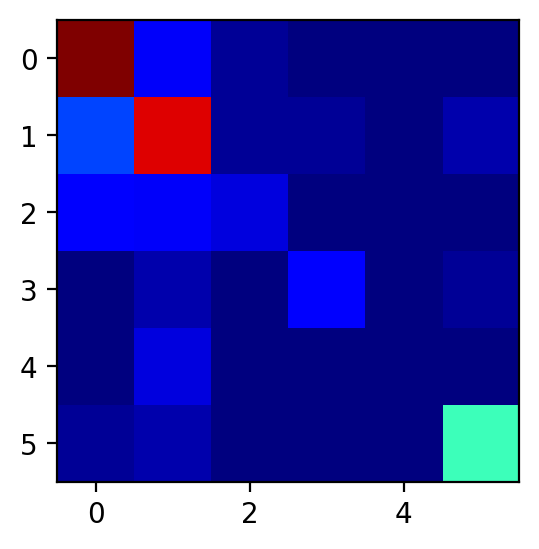

In [20]:
cnf_matrix = confusion_matrix(Y_train,pred)
print(cnf_matrix)

#plotting the matrix in with plotly
plt.imshow(cnf_matrix,cmap=plt.cm.jet)

<AxesSubplot:>

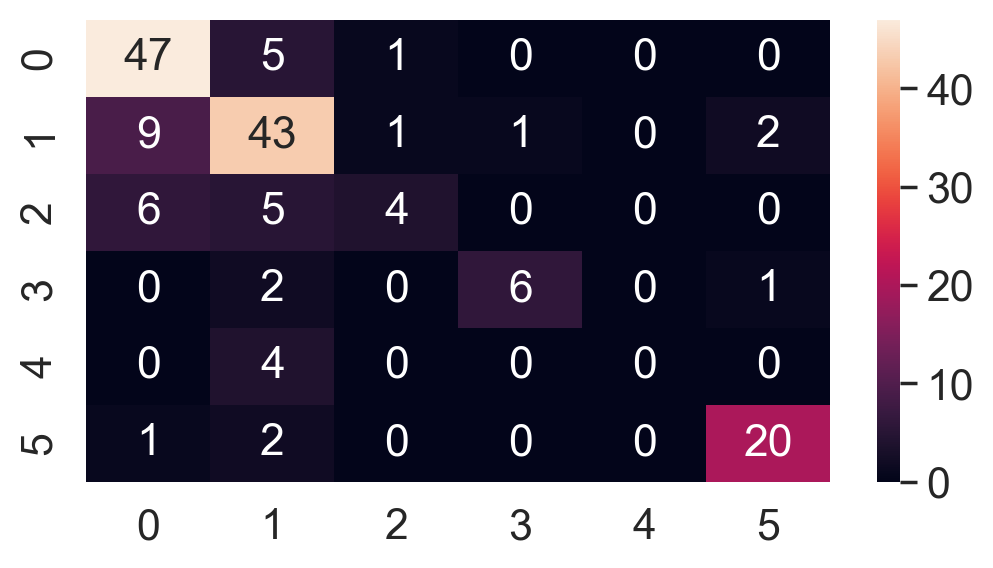

In [21]:
df_cm = pd.DataFrame(cnf_matrix, range(6),range(6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={'size': 16})# font size

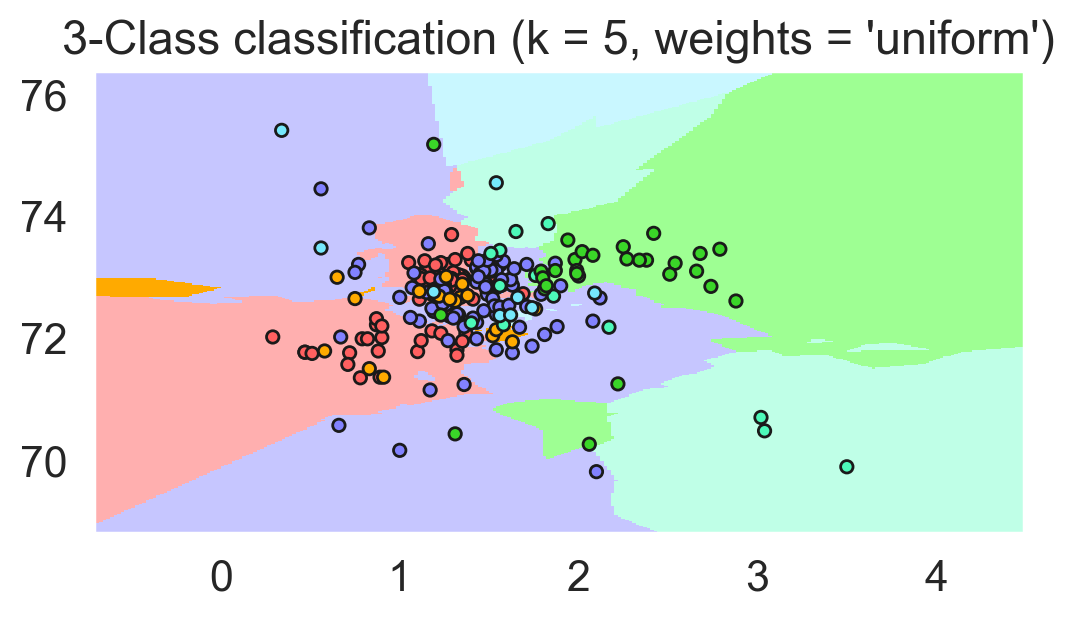

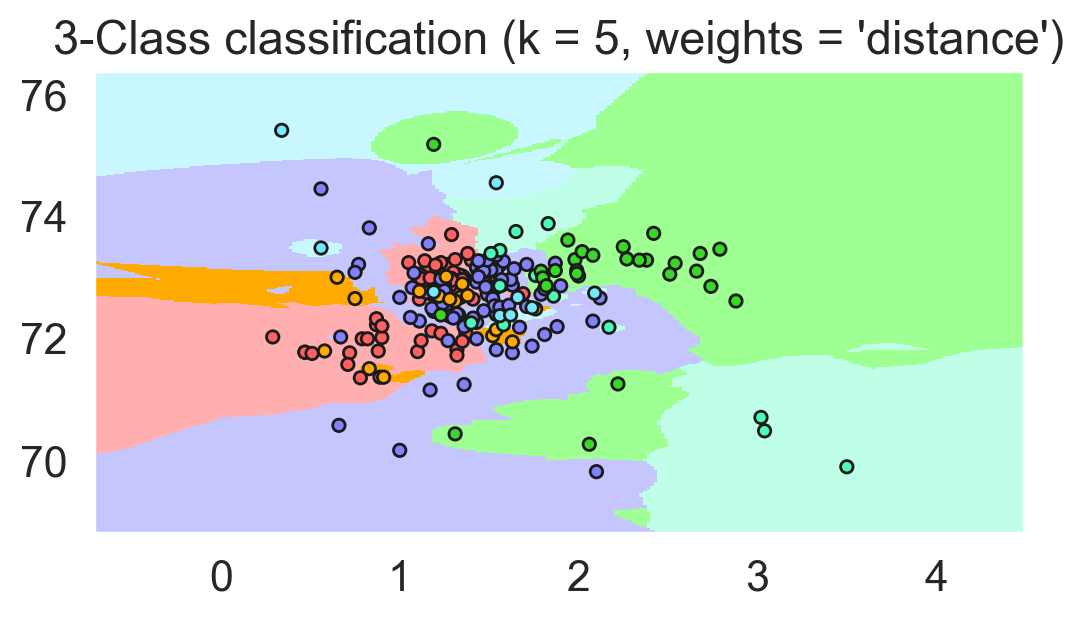

In [22]:
# plotting the decision boundries for the data

h = .02 # step size in the mesh
n_neighbors = 5 # No of neighbours
for weights in ['uniform','distance']:
    # We create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, Y)
    
    # Plot the decision boundary. for that, We Will assign a color to each
    # point in the mesh [X_min, X_max]X[Y_min, y_max]
    X_min, X_max = X[:, 0].min() -1, X[:,0].max() + 1
    Y_min, Y_max = X[:, 1].min() -1, X[:,1].max() + 1
    XX, YY = np.meshgrid(np.arange(X_min, X_max, h),
                         np.arange(Y_min, Y_max, h))
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # ravel to flatten the into 1D and c_ to concatenate
    
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure()
    plt.pcolormesh(XX, YY, Z, cmap=cm_bright)
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_dark,
               edgecolor = 'k', s=20)
    plt.xlim(XX.min(), XX.max())
    plt.ylim(YY.min(), YY.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"% (n_neighbors, weights))
    
plt.show()

# Cross Validation score

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
# Get cross validation score of K-Nearest Neighbors

In [25]:
cv_scores = []

In [26]:
score_knn=cross_val_score(clf, X,Y, cv=10)

In [28]:
print("K-Nearest Neighbors Accuracy: %0.2f (+/- %0.2f) with k value equals to 3" % (score_knn.mean(), score_knn.std() * 2))

K-Nearest Neighbors Accuracy: 0.57 (+/- 0.30) with k value equals to 3


In [29]:
k_values = np.arange(1,20)
train_accuracy = []
test_accuracy = []

In [30]:
for i, k in enumerate(k_values):
    # k from 1 to 20(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,Y_train)
    # train accuracy
    train_accuracy.append(knn.score(X_train, Y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, Y_test))

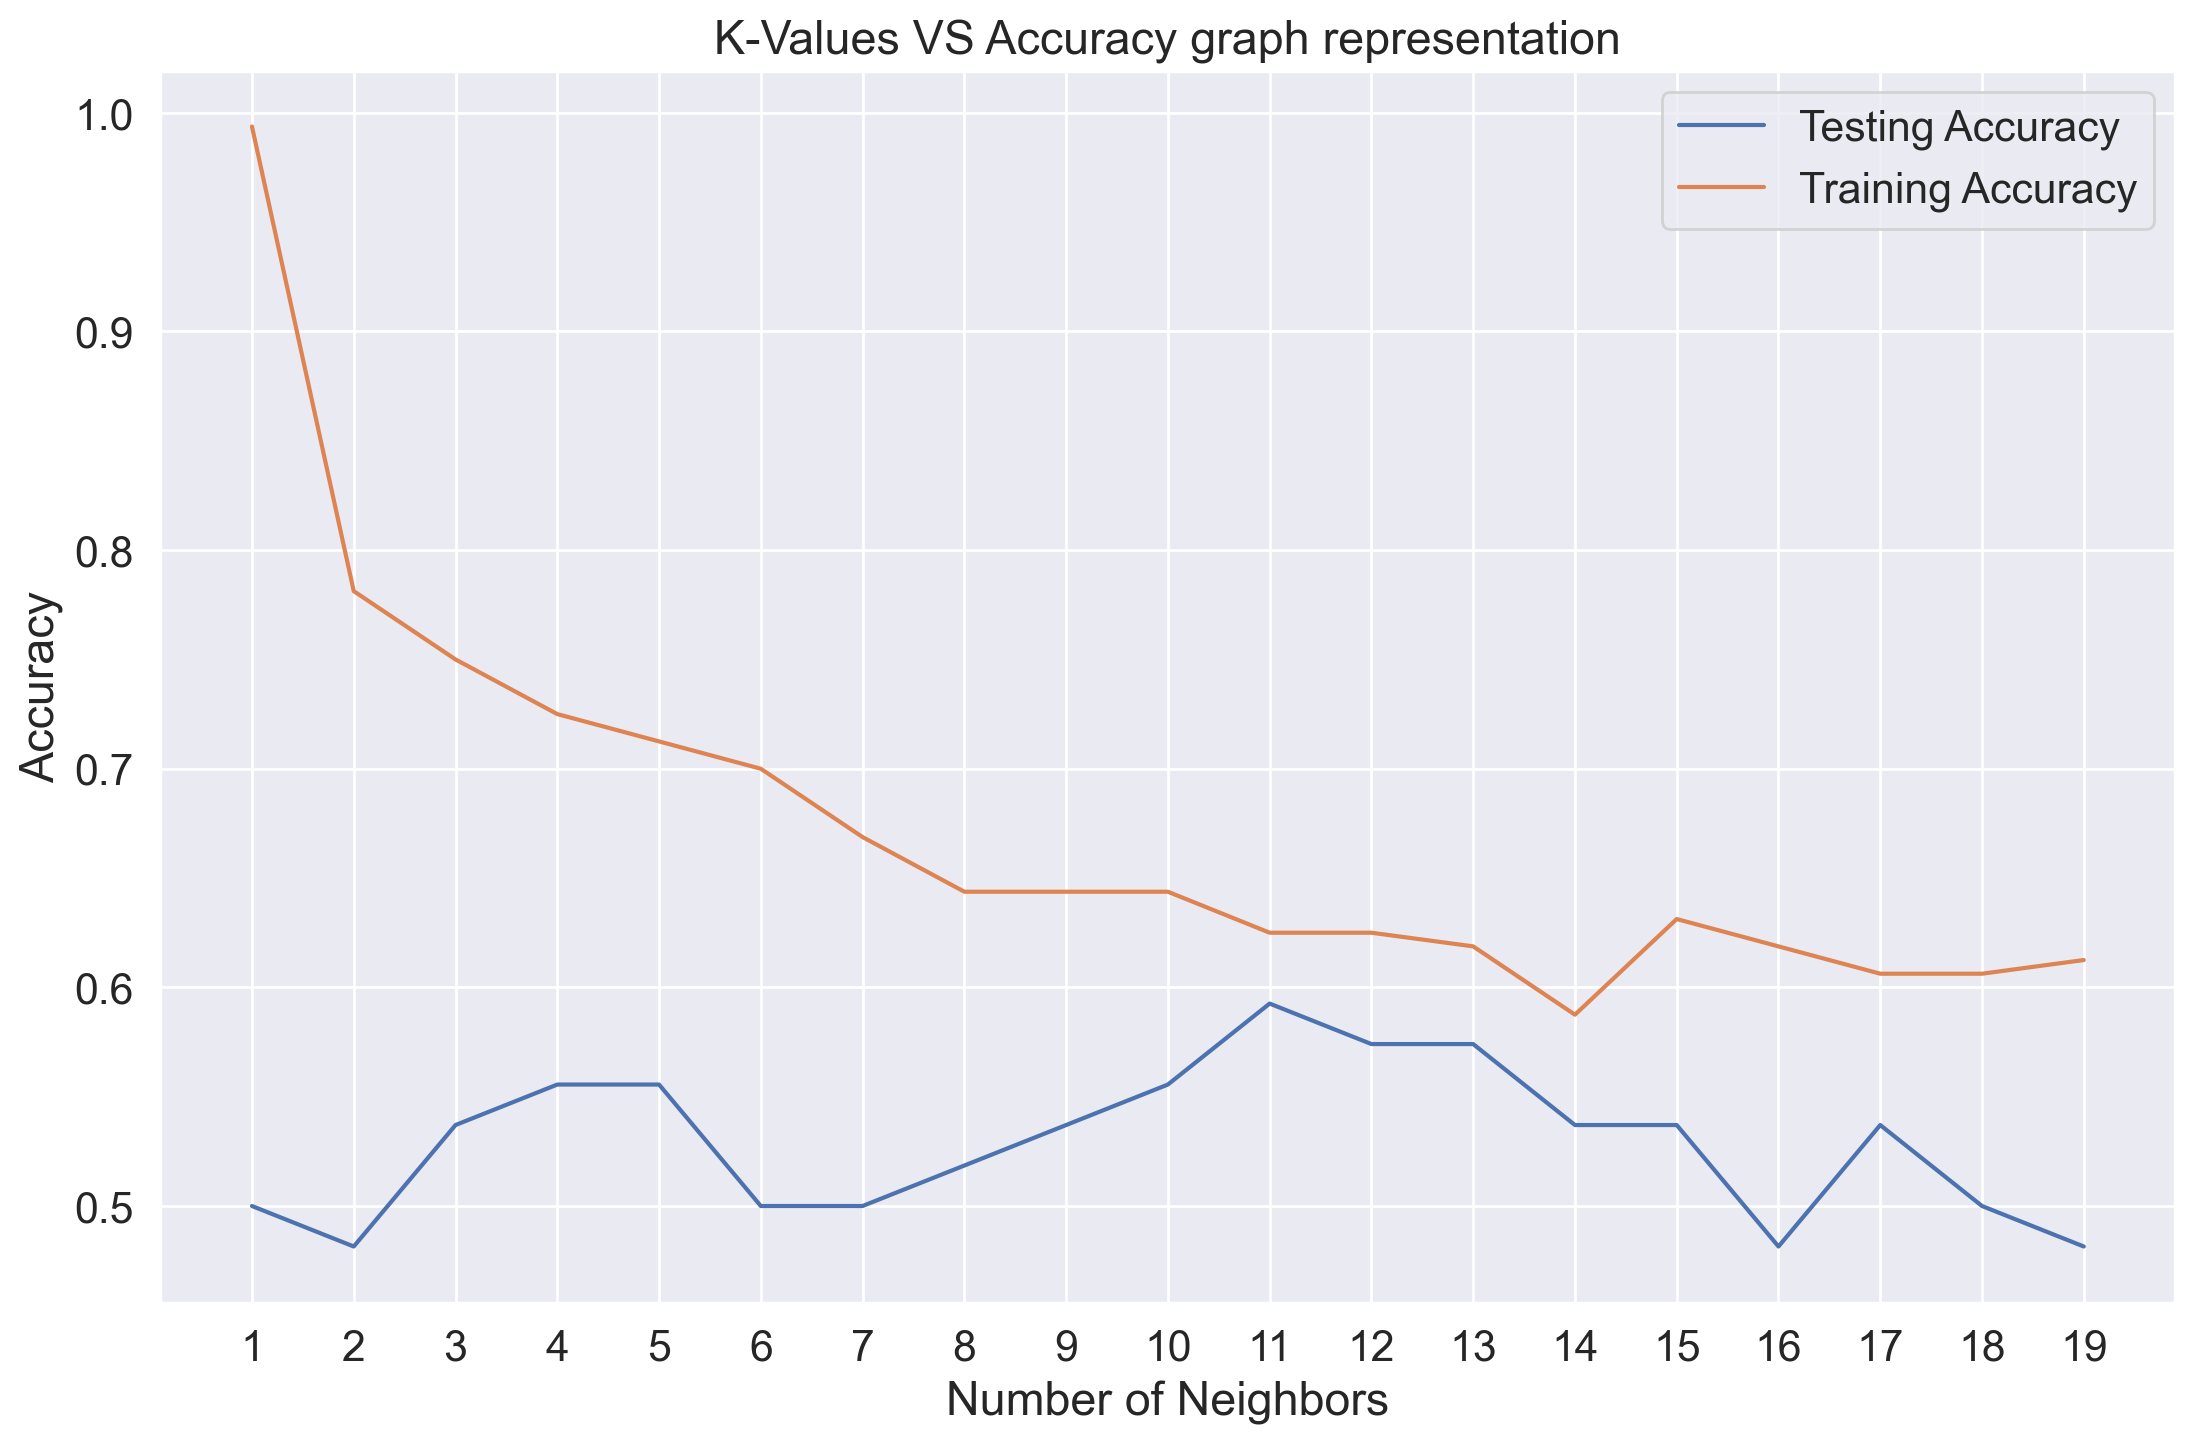

Best accuracy is 0.5925925925925926 with k = 11


In [31]:
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('K-Values VS Accuracy graph representation')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)

plt.show()
print("Best accuracy is {} with k = {}". format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

cv_scores.append(np.max(test_accuracy))